In [2]:
import cv2

video_path = "./24 Hour Time Lapse.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open the video file.")
    exit()

frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video or cannot fetch the frame.")
        break
    
    frames.append(frame)
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()

cv2.destroyAllWindows()

End of video or cannot fetch the frame.


In [3]:
len(frames)

3635

In [4]:
from matplotlib import pyplot as plt

In [5]:
image_night_RGB = cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB)
image_day_RGB = cv2.cvtColor(frames[2000], cv2.COLOR_BGR2RGB)

image_night_HSV = cv2.cvtColor(frames[0], cv2.COLOR_BGR2HSV)
image_day_HSV = cv2.cvtColor(frames[2000], cv2.COLOR_BGR2HSV)

_, _, image_night_Value = cv2.split(image_night_HSV)
_, _, image_day_Value = cv2.split(image_day_HSV)

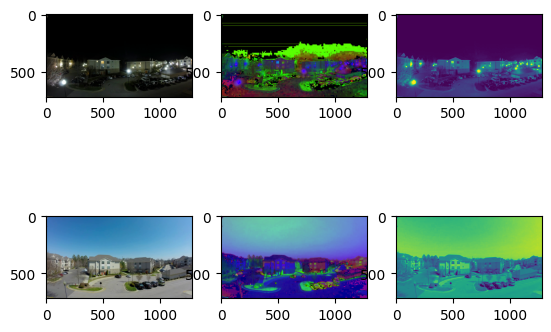

In [6]:
plt.subplot(2,3,1)
plt.imshow(image_night_RGB)

plt.subplot(2,3,2)
plt.imshow(image_night_HSV)

plt.subplot(2,3,3)
plt.imshow(image_night_Value)

plt.subplot(2,3,4)
plt.imshow(image_day_RGB)

plt.subplot(2,3,5)
plt.imshow(image_day_HSV)

plt.subplot(2,3,6)
plt.imshow(image_day_Value)

In [7]:
image_night_Value.shape

(720, 1278)

In [8]:
for row in image_night_Value:
    print (row)

[2 2 1 ... 0 0 0]
[2 2 1 ... 0 0 0]
[2 2 2 ... 0 0 0]
[2 2 2 ... 0 0 0]
[31  7  1 ...  0  0  0]
[69 45 12 ...  0  0  0]
[72 72 58 ...  0  0  0]
[68 72 79 ...  0  0  0]
[73 75 75 ...  0  0  0]
[68 73 76 ...  0  0  0]
[56 61 70 ...  0  0  0]
[56 53 58 ...  0  0  0]
[56 56 55 ...  0  0  0]
[57 57 54 ...  0  0  0]
[65 63 56 ...  0  0  0]
[71 68 59 ...  0  0  0]
[76 73 68 ...  0  0  0]
[76 73 69 ...  0  0  0]
[74 72 71 ...  0  0  0]
[74 74 74 ...  0  0  0]
[75 75 74 ...  0  0  0]
[75 75 75 ...  0  0  0]
[75 75 75 ...  0  0  0]
[75 75 75 ...  0  0  0]
[74 74 74 ...  0  0  0]
[74 74 74 ...  0  0  0]
[74 74 74 ...  0  0  0]
[74 74 74 ...  0  0  0]
[69 70 71 ...  0  0  0]
[65 67 68 ...  0  0  0]
[64 65 67 ...  0  0  0]
[67 67 68 ...  0  0  0]
[63 65 65 ...  0  0  0]
[57 59 62 ...  0  0  0]
[57 56 59 ...  0  0  0]
[56 54 54 ...  0  0  0]
[54 54 54 ...  0  0  0]
[62 58 51 ...  0  0  0]
[63 57 54 ...  0  0  0]
[54 56 62 ...  0  0  0]
[47 51 56 ...  0  0  0]
[48 47 44 ...  0  0  0]
[48 40 24 ...  0

In [9]:
for row in image_day_Value:
    print (row)

[179 182 187 ... 221 221 221]
[175 177 183 ... 221 221 221]
[158 144 161 ... 221 221 221]
[216 168 154 ... 221 221 221]
[221 200 168 ... 221 221 221]
[219 223 233 ... 221 221 221]
[213 216 223 ... 221 221 221]
[202 208 216 ... 221 221 221]
[168 205 219 ... 221 221 221]
[111 154 197 ... 221 221 221]
[ 83  99 139 ... 221 221 221]
[ 91  88  91 ... 221 221 221]
[ 88  91  88 ... 221 221 221]
[ 86  86  87 ... 221 221 221]
[ 88  88  88 ... 221 221 221]
[ 90  89  89 ... 221 221 221]
[ 90  90  89 ... 221 221 221]
[ 90  89  89 ... 221 221 221]
[ 90  88  95 ... 221 221 221]
[120  90  90 ... 221 221 221]
[173 130  92 ... 221 221 221]
[198 188 153 ... 221 221 221]
[198 202 195 ... 221 221 221]
[190 190 190 ... 221 221 221]
[188 190 192 ... 221 221 221]
[182 186 193 ... 221 221 221]
[173 178 189 ... 221 221 221]
[161 168 179 ... 221 221 221]
[147 157 166 ... 221 221 221]
[129 138 152 ... 221 221 221]
[109 118 132 ... 221 221 221]
[ 91  98 109 ... 221 221 221]
[ 84  86  89 ... 221 221 221]
[ 86  88  

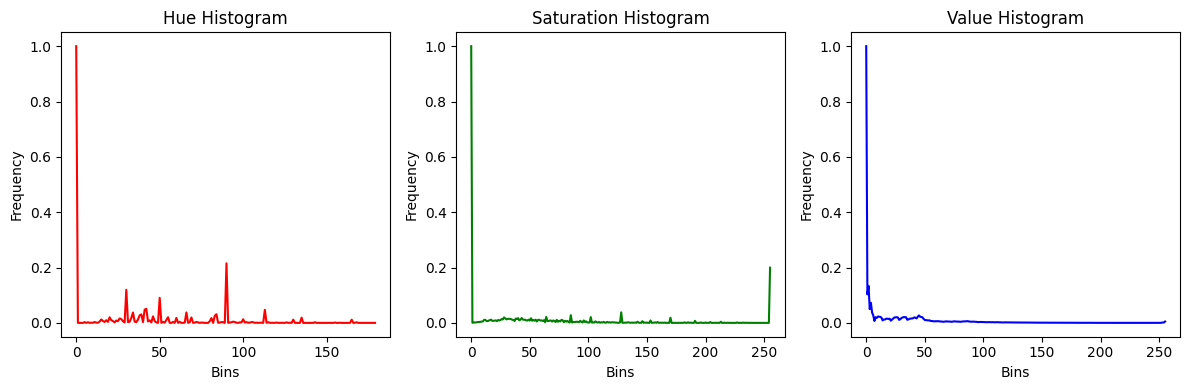

In [10]:
hsv_image = image_night_HSV

h_hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])  # Hue ranges from 0 to 179

# Saturation (S) channel histogram
s_hist = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])  # Saturation ranges from 0 to 255

# Value (V) channel histogram
v_hist = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])  # Value ranges from 0 to 255

# Normalize histograms for better visualization (optional)
h_hist = cv2.normalize(h_hist, h_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
s_hist = cv2.normalize(s_hist, s_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
v_hist = cv2.normalize(v_hist, v_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Plot the histograms
plt.figure(figsize=(12, 4))

# Plot Hue histogram
plt.subplot(1, 3, 1)
plt.plot(h_hist, color='r')
plt.title('Hue Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Plot Saturation histogram
plt.subplot(1, 3, 2)
plt.plot(s_hist, color='g')
plt.title('Saturation Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Plot Value histogram
plt.subplot(1, 3, 3)
plt.plot(v_hist, color='b')
plt.title('Value Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

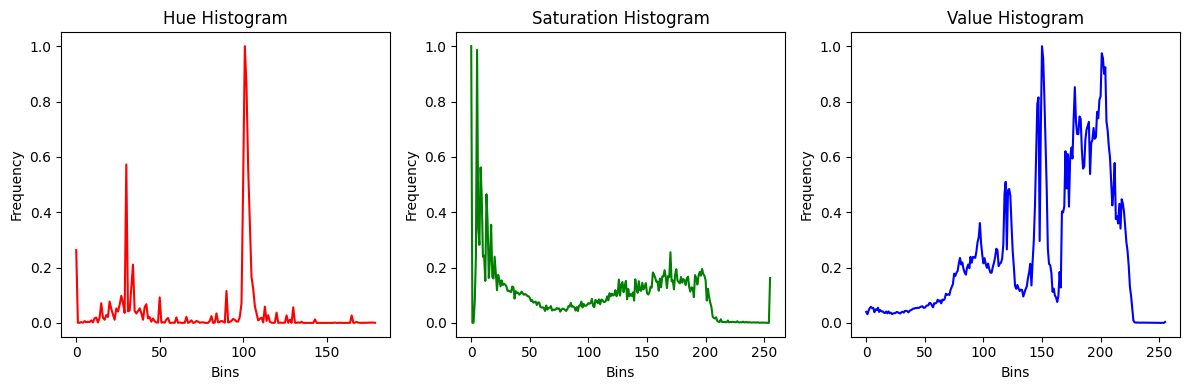

In [11]:
hsv_image = image_day_HSV

h_hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])  # Hue ranges from 0 to 179

# Saturation (S) channel histogram
s_hist = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])  # Saturation ranges from 0 to 255

# Value (V) channel histogram
v_hist = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])  # Value ranges from 0 to 255

# Normalize histograms for better visualization (optional)
h_hist = cv2.normalize(h_hist, h_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
s_hist = cv2.normalize(s_hist, s_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
v_hist = cv2.normalize(v_hist, v_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Plot the histograms
plt.figure(figsize=(12, 4))

# Plot Hue histogram
plt.subplot(1, 3, 1)
plt.plot(h_hist, color='r')
plt.title('Hue Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Plot Saturation histogram
plt.subplot(1, 3, 2)
plt.plot(s_hist, color='g')
plt.title('Saturation Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Plot Value histogram
plt.subplot(1, 3, 3)
plt.plot(v_hist, color='b')
plt.title('Value Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np

hue_list = []
saturation_list = []
value_list = []

for frame in frames:
    HSV_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    hue_channel = HSV_frame[:, :, 0]
    saturation_channel = HSV_frame[:, :, 1]
    value_channel = HSV_frame[:, :, 2]

    average_hue = np.mean(hue_channel)
    average_saturation = np.mean(saturation_channel)
    average_value = np.mean(value_channel)

    hue_list.append(average_hue)
    saturation_list.append(average_saturation)
    value_list.append(average_value)

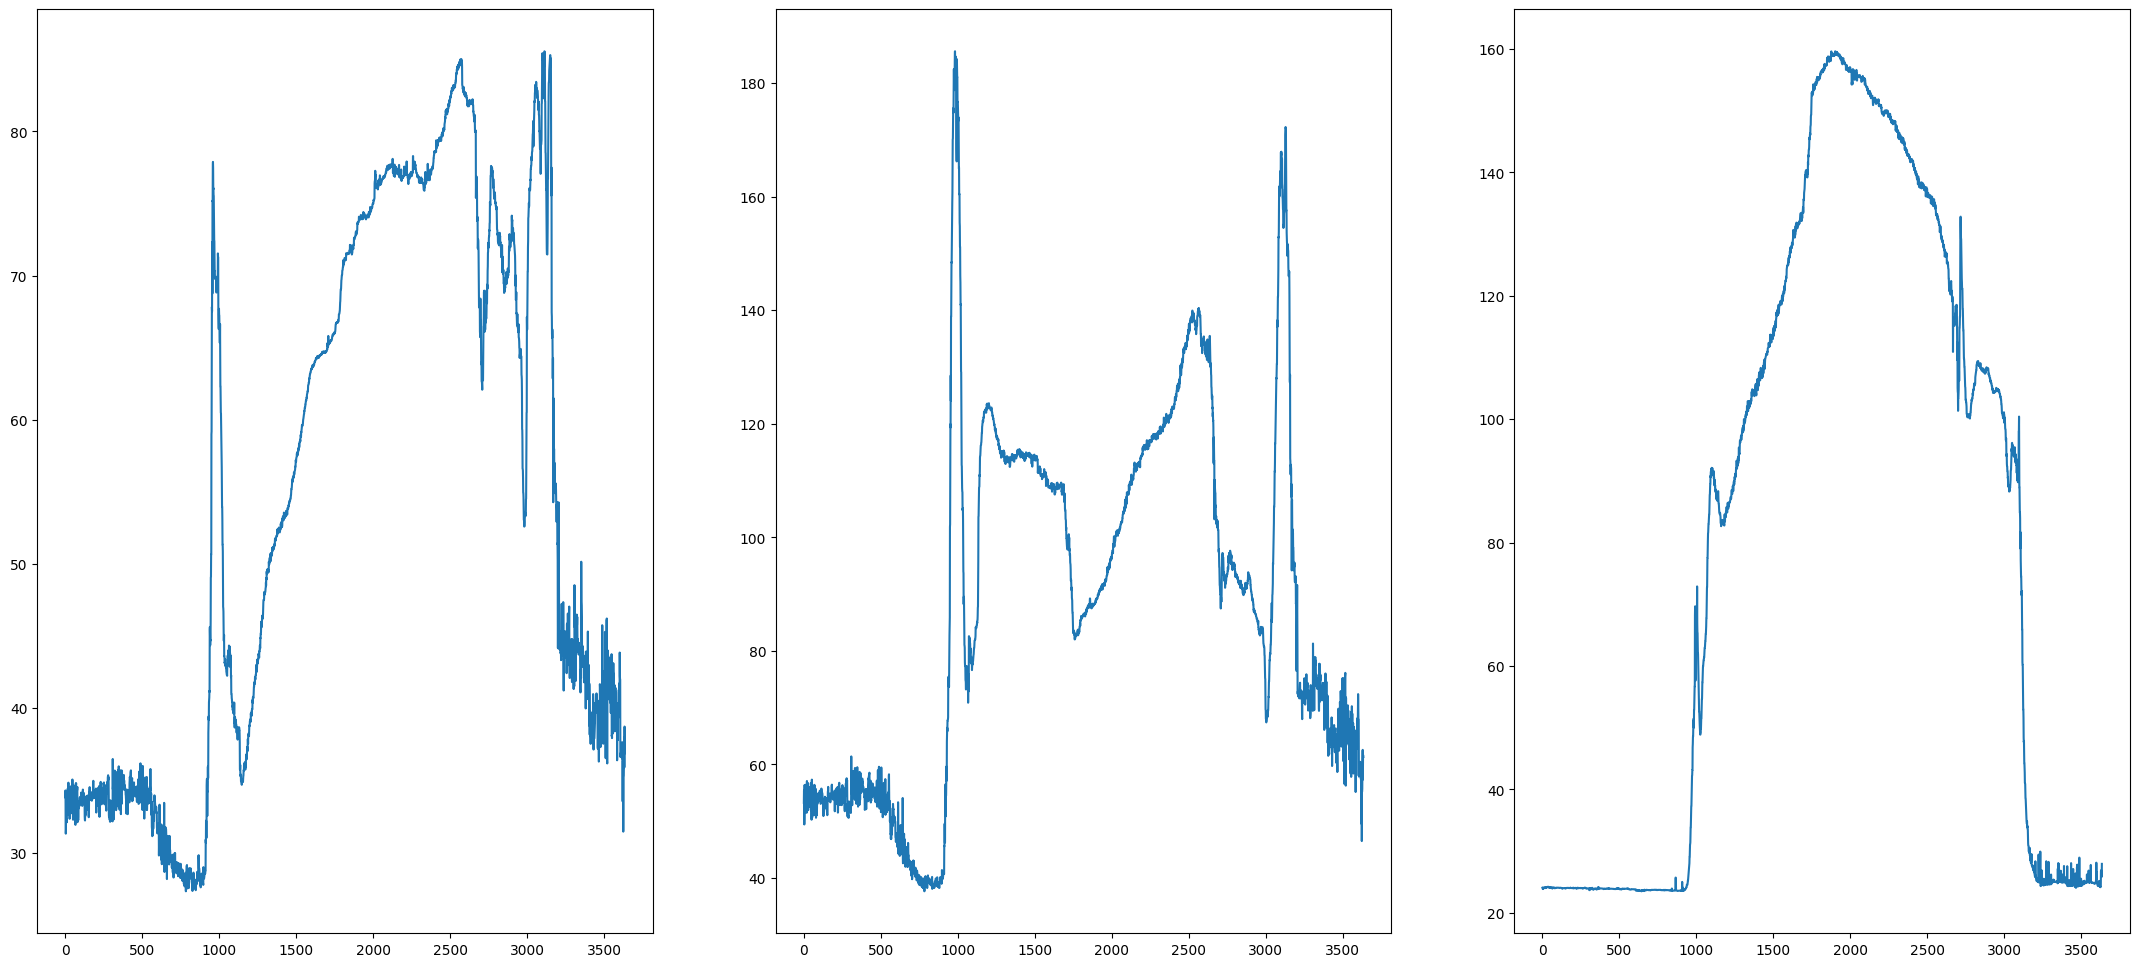

In [13]:
plt.figure(figsize=(27, 12))

plt.subplot(1, 3, 1)
plt.plot(hue_list)

plt.subplot(1, 3, 2)
plt.plot(saturation_list)

plt.subplot(1, 3, 3)
plt.plot(value_list)

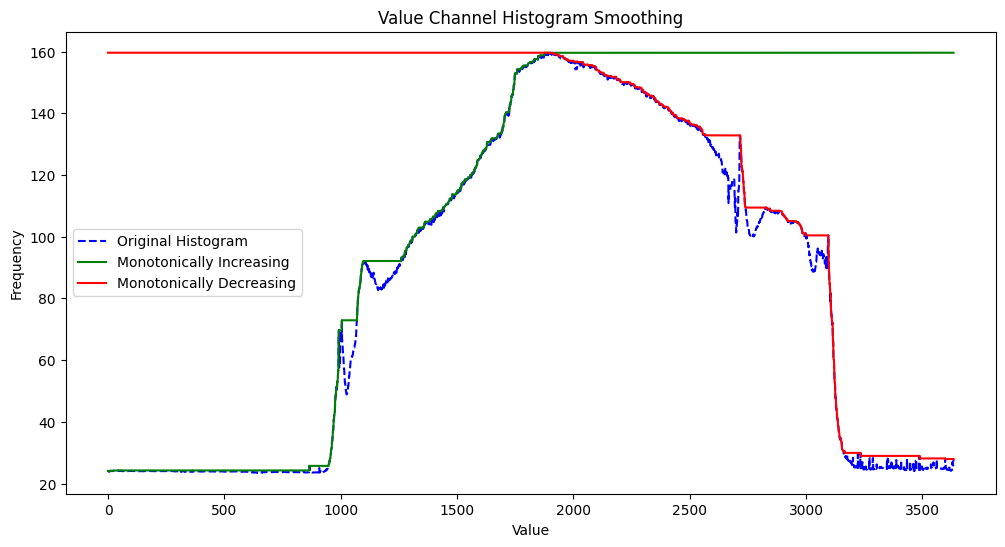

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def smooth_histogram_to_increase(hist):
    """
    Smooth the histogram to make it monotonically increasing.
    :param hist: Input histogram (1D array).
    :return: Smoothed histogram (monotonically increasing).
    """
    smoothed_hist = np.maximum.accumulate(hist)
    return smoothed_hist

def smooth_histogram_to_decrease(hist):
    """
    Smooth the histogram to make it monotonically decreasing.
    :param hist: Input histogram (1D array).
    :return: Smoothed histogram (monotonically decreasing).
    """
    smoothed_hist = np.maximum.accumulate(hist[::-1])[::-1]
    return smoothed_hist

# Compute the histogram for the Value channel
value_hist = value_list

# Smooth to increase or decrease
increasing_hist = smooth_histogram_to_increase(value_hist)
decreasing_hist = smooth_histogram_to_decrease(value_hist)

# Plot the original and smoothed histograms
plt.figure(figsize=(12, 6))
plt.plot(value_hist, label="Original Histogram", color="blue", linestyle="--")
plt.plot(increasing_hist, label="Monotonically Increasing", color="green")
plt.plot(decreasing_hist, label="Monotonically Decreasing", color="red")
plt.title("Value Channel Histogram Smoothing")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Input: Locally Stored Vedio

Processes
* Step-1: Read Frame one by one from the vedio path
* Step-2: Convert the read BGR image to HSV image
* Step-3: Get the V channel from it
* Step-4: Calculate the average value from it
* Step-5: Initialize an empty list
* Step-6: If the average value < 60 then add 0 to the newly created list
* Step-7: If the average value > 130 then add 2 to the newly created list
* Step-8: If the average value(X) is in between 60 and 130 then check the previous frame average value(A) :- X >= A => Add 1 to list else Add 3 to list
* Step-9: Get the sum of 0, 1, 2 and 3 in the list and get the percentage of these 

[
    Here 0 stands for night,
    Here 1 stands for morning,
    Here 2 stands for afternoon,
    Here 3 stands for evening
]

Output: Night=P%, Morning=Q%, Afternoon=R% and Evening=S%

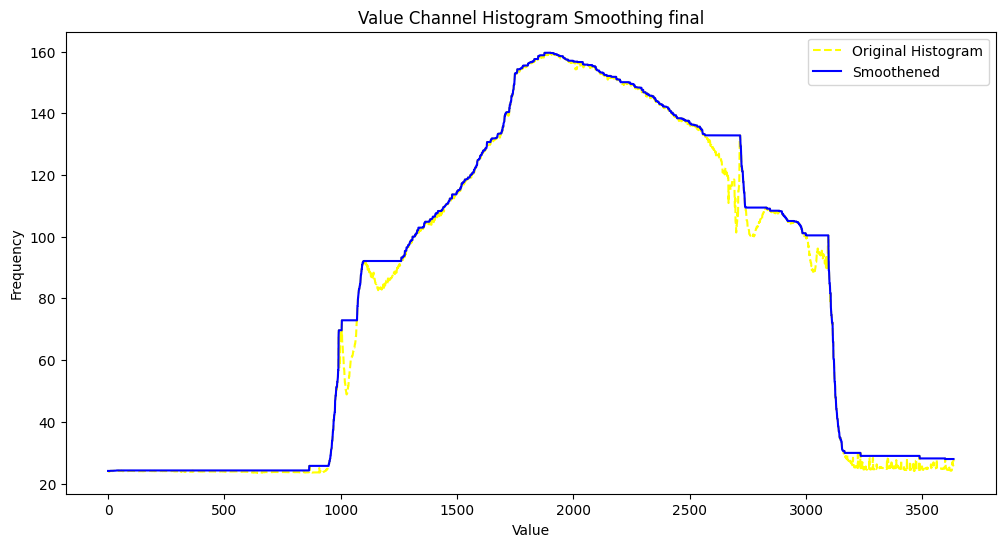

In [17]:
smoothened_value_hist = []
for index in range(len(frames)):
    if (increasing_hist[index] < decreasing_hist[index]):
        smoothened_value_hist.append(increasing_hist[index])
    else:
        smoothened_value_hist.append(decreasing_hist[index])

plt.figure(figsize=(12, 6))
plt.plot(value_hist, label="Original Histogram", color="yellow", linestyle="--")
plt.plot(smoothened_value_hist, label="Smoothened", color="blue")
plt.title("Value Channel Histogram Smoothing final")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [20]:
night_counts = 0
morning_counts = 0
afternoon_counts = 0
evening_counts = 0

for index in range(len(frames)):
    if (smoothened_value_hist[index] <= 60):
        night_counts += 1
    elif (60 < smoothened_value_hist[index] < 130):
        if (smoothened_value_hist[index-1] <= smoothened_value_hist[index]):
            morning_counts += 1
        else:
            evening_counts += 1
    else:
        afternoon_counts += 1

In [21]:
night_counts

1505

In [22]:
morning_counts

963

In [23]:
afternoon_counts

1090

In [24]:
evening_counts

77

In [40]:
night_percent = round((night_counts/len(frames))*100, 2)
morning_percent = round((morning_counts/len(frames))*100, 2)
afternoon_percent = round((afternoon_counts/len(frames))*100, 2)
evening_percent = round((evening_counts/len(frames))*100, 2)

In [42]:
print("Night percentage of the timelapse vedio is " + str(night_percent) + "%")
print("Morning percentage of the timelapse vedio is " + str(morning_percent) + "%")
print("Afternoon percentage of the timelapse vedio is " + str(afternoon_percent) + "%")
print("Evening percentage of the timelapse vedio is " + str(evening_percent) + "%")

Night percentage of the timelapse vedio is 41.4%
Morning percentage of the timelapse vedio is 26.49%
Afternoon percentage of the timelapse vedio is 29.99%
Evening percentage of the timelapse vedio is 2.12%
